# Linear Regression in Practice

In this lab we will work through an extended example of exploratory data analysis and supervised machine learning using the California Housing Price Dataset. This dataset consists of data about housing characteristics and prices in many districts of the state of California. The **task** this dataset asks us to solve is estimating the median house value in a district from a set of independent housing characteristics.

**Note**: the exercises are inline in this notebook and *not* at the end. The exercises will ask you to write some code and sometimes to provide some analysis of your findings in Markdown cells at the end of the exercise.

## Part 1: Warming Up

In this first set of exercises we will analyze our dataset and build a simple linear regression pipeline. This is a fairly typical task that is asked of anyone working with Data Science: Here is some data, do something useful with it!

### Step 1: Data Modeling

OK, let's get started. The first thing we want to do is get our dataset loaded and start to get a feel for it. This is always a good idea -- we *play* with the data first in order to get a better understanding of it.

In [2]:
# Initial imports -- these are fairly standard.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the function that will download the dataset.
from sklearn.datasets import fetch_california_housing

# Load the sklearn version of the California Housing dataset.
ds = fetch_california_housing()

### Exercise 1a: Poking Around

Spend some time looking at the elements of the `ds` we just loaded (it's a python `dict`). Find the description of the dataset and make sure you understand what the features are and what the targets variable is. **Hints**: to get the keys of the dictionary, use: `ds.keys()`.

We are going to construct a Pandas `DataFrame` in the next exercise. Where can you get reasonable column names from the sklearn dataset object?

In [5]:
ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
print(ds.DESCR) #read the description of the dataset to learn the different attributes
print(ds.target)
ds.data.shape
print(f'Data shape: {ds.data.shape}')
print(f'Target shape: {ds.target}')

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

**Analysis**: the Californian Housing dataset has 8 numeric attributes(MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude) and a single scalar target (median house value).
ds.data contains 20640 rows of 8 columns(input features) and ds.target contains the regression targets.
ds.feature_names contains the name of each target.

### Exercise 1b: Creating a Pandas DataFrame

OK, now we can create the `DataFrame` to hold our independent variables and a `Series` to hold the target values. Make sure you use good column names when constructing the `DataFrame`. Some relevant documentation: [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) and [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

In [8]:
# Create a Pandas DataFrame for our dataset and a Pandas Series for the targets.

# Your code to build the DataFrame here (replace None)
df = pd.DataFrame(data=ds.data, columns=ds.feature_names)

# Your code to build the target Series here (replace None)
targets = pd.Series(ds.target, name='MedHouseVal')

### Exercise 1c: Examining the Data

Study the *descriptive statistics* of the data. Do you notice anything "strange" about any of the features? Are the features scaled similarly? **Hint**: Use the `.describe()` method on the DataFrame you created.

In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


**Analysis**: we have very different scales in these features,from $\mathcal{0}:{1} desde unidad en unidad hasta miles y todo in between. Also the variance of the features is wildly different.

---
### Step 2: Visualization

OK, now that we have a bit of a *feel* for our data, let's get a better idea about it through visualization.

### Exercise 2a: Visualizing the Target
Create a plot to study the **distribution** of our target values. The best tool for that is a **histogram**. Search for this functionality in the Matplotlib documentation.

**Note**: In addition to *histograms*, try out the Seaborn function `distplot`.

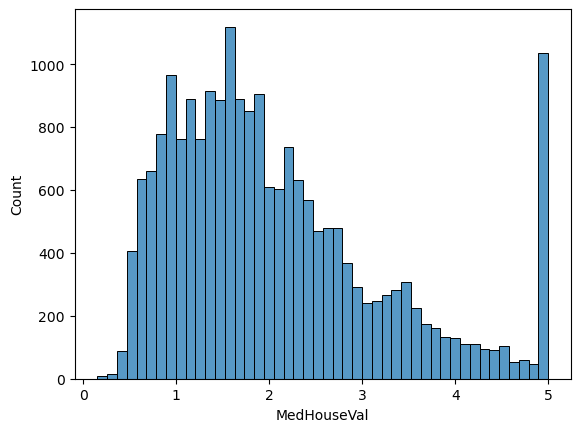

In [10]:
import seaborn as sns
#hacerlo del 0 al 5
fig, ax = plt.subplots()
fig = sns.histplot(targets)
#there are 30 bins as default in seaborn, its a discrete distribution and its great visually to analize the data.

**Analysis** : The target variables are skewed towards the low end, but with very many outliers at the top end.

### Exercise 2b: Subplots
Now create a multi-plot figure to visualize the distributions of **all** of the independent features in the dataset. Make sure you use `figsize=` to resize the figure appropriately.

A few things that will help with this:
+ If you want to index columns by **integer** indices, use the `.iloc()` method (e.g. `df.iloc[:,1]`).
+ If you extract a column as a `Series` from a `DataFrame`, you can recover its name with the `name` attribute.
+ Encapsulate you plotting code in a **function** you can call later.

**Super Hint**: Pandas already has this functionality **built-in**. If you can find it, use it!


In [11]:
def multHist():
    return df.hist(bins=15,figsize=(20,23))

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>, <AxesSubplot:>]],
      dtype=object)

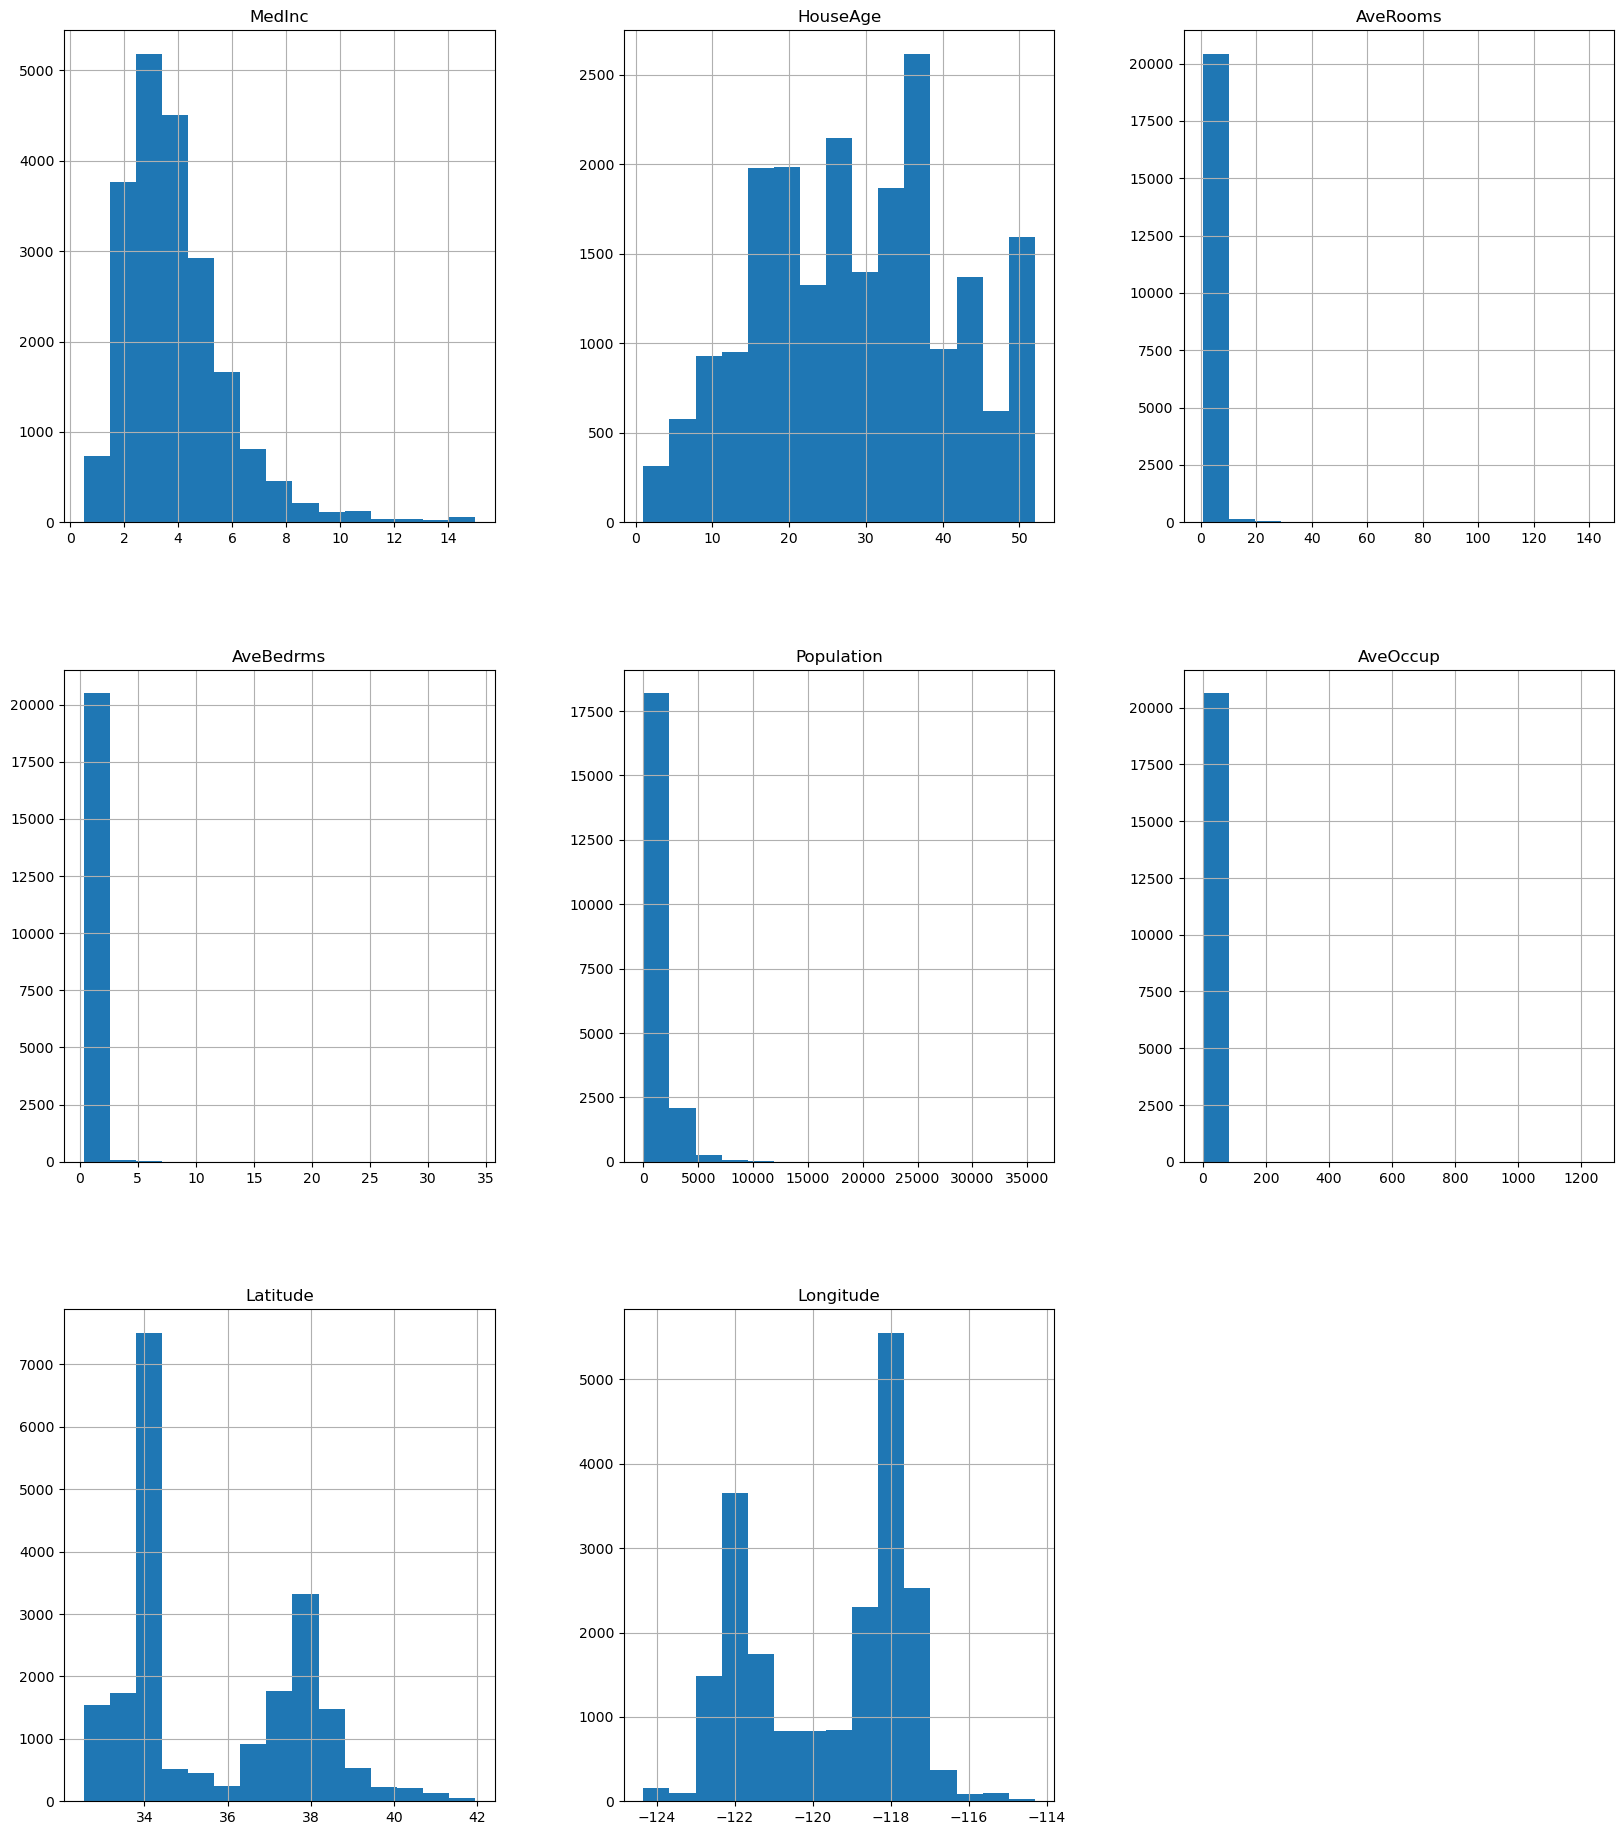

In [12]:
multHist()

---
## Step 3: Split you Data

A very important step. Now we will split our `DataFrame` into training and testing splits.

### Exercise 3.1: Create a Split
Now we need to create our training and testing splits. Read the documentation for `sklearn.model_selection.train_test_split()`. Use this function to create a **training** split with 75% of the data, and a **test** split with 25% of the data.

In [13]:
# Your code here.
from sklearn.model_selection import train_test_split

# Split data into 75-25 train/test split -- replace the [None]*4 with your code.
(Xtr, Xte, ytr, yte) = train_test_split(df,targets,test_size=0.25, train_size=0.75, random_state=1)
Xtr, Xte

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 13053  3.3926      32.0  5.575439   1.063743      4951.0  2.895322     38.60   
 2653   2.3571      52.0  6.008130   1.067751       907.0  2.457995     40.58   
 3078   6.2885       6.0  6.909449   1.102362       664.0  2.614173     35.47   
 3655   3.6618      36.0  4.483660   0.964052       774.0  2.529412     34.22   
 4974   1.2778      42.0  3.461538   1.149798       890.0  3.603239     34.00   
 ...       ...       ...       ...        ...         ...       ...       ...   
 10955  1.7823      17.0  4.055046   1.087156      1079.0  2.474771     33.76   
 17289  8.5608      42.0  6.788462   1.011538       753.0  2.896154     34.42   
 5192   1.1326      42.0  4.890785   1.006826       775.0  2.645051     33.93   
 12172  2.6322      10.0  4.991614   0.951782      1323.0  2.773585     33.73   
 235    2.3036      35.0  4.620513   1.176923      1009.0  2.587179     37.79   
 
        Longitude  
 13053

### Exercise 3.2: Fit a LinearRegression
Finally some machine learning. Study the documentation for `class sklearn.linear_model.LinearRegression`. Then write some code to fit a linear regression model to your **training** split. Try out your model by computing predictions on some data (use the `model.predict()` method).


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtr,ytr)
#try to predict data with model.predict()
model.predict(Xte)
#test the accuracy
model.score(Xte,yte)#the model is accurate 59% of the time

0.5929869285760099

### Exercise 3.3: Evaluate your Model
Write some code to compute the root mean-squared error (RMSE) and mean absolute error (MAS) for you model predictions. Try it on both the **test** and **training** splits.

In [15]:
from sklearn.metrics import mean_absolute_error 
# RMSE
#La RECM es siempre no negativa, y un valor de 0 (casi nunca alcanzado en la práctica) indicaría un ajuste 
#perfecto a los datos. En general, una RECM más baja es mejor que una más alta.
print("RMSE trainig split:", np.sqrt((((model.predict(Xtr)-ytr)**2.0)).mean()))
print("RMSE test split:", np.sqrt((((model.predict(Xte)-yte)**2.0)).mean()))
#MAS
#sirve para cuantificar la precisión de una técnica de predicción 
print("MAS training split:", mean_absolute_error(model.predict(Xtr),ytr))
print("MAS test split:", mean_absolute_error(model.predict(Xte),yte))

#change the proportions
(Xtr2, Xte2, ytr2, yte2) = train_test_split(df,targets,test_size=0.05, train_size=0.95, random_state=1)
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(Xtr2,ytr2)
print("RMSE trainig split 2:", np.sqrt((((model2.predict(Xtr2)-ytr2)**2.0)).mean()))
print("RMSE test split 2:", np.sqrt((((model2.predict(Xte2)-yte2)**2.0)).mean()))

RMSE trainig split: 0.721668717776031
RMSE test split: 0.7318833817912904
MAS training split: 0.530700684720785
MAS test split: 0.535100844528248
RMSE trainig split 2: 0.7232580152479632
RMSE test split 2: 0.7401065214797623


**Analysis: Why is the performance on the train set different than that on the test split? What if you change the proportion of training to test data in your splits?**
The performance is better on the train test than on the test split because the proportion of data is much larger and with more data the predictions are more accurate. Both the RMSE and the MAS are better for the training split because of this even though there's still inaccuracy in the predictions. If we change the proportions, the split with the larger number of data will be the one with the lower RMSE and therefore will be the more accurate.

### Exercise 3.4: Visualizing the Results
Now I want you to write a function that makes a **residual plot** of the data and the model predictions. This plot should show, for each data point, the **signed error** (i.e. y - predicted) of the model prediction. Do you notice any **patterns** in the errors? Can you link this to previous analyses you made? 

In [16]:
def resultado(model,targets,preds):
    return plt.plot(targets-model.predict(preds))

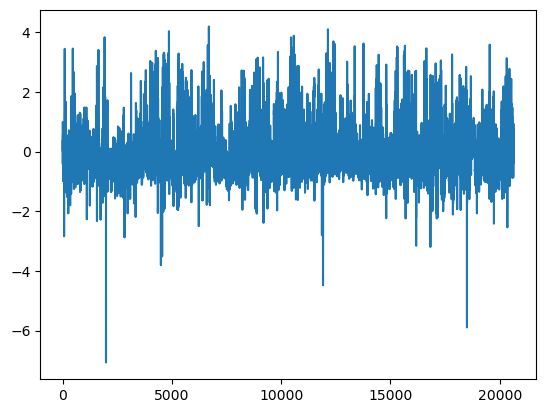

In [17]:
resultado(model,targets,df)

**Analysis:** In the residual plot we can see the signed error of the predictions of the model. There are a few outliers but overall the error remains between the values -2 and 4. If we compare the plot with different train sets we can see that with more data in the training set, the error decreases.

### Step 4: Repeat.

Now you should put all of the pieces together into a repeatable, reproducible pipeline.

### Exercise 4: The Pipeline
Write a function (or even just code in the cell that calls previously defined functions) that runs an **experiment**:
1. Splitting data
1. Instantiating the model
1. Fitting the model
1. Evaluating the model
1. (Maybe) Visualizing results

Experiment with different splits to see if the results are the same. Try using more or less training data with respect to test data. Observe how the results change.

In [18]:
def pipeline(model, df, targets, ts):
    #splitting data
    (Xtr, Xte, ytr, yte) = train_test_split(df,targets,train_size=ts, random_state=1)
    #instantiating model
    model = LinearRegression()
    #fitting model
    model.fit(Xtr,ytr)
    #evaluating model
    from sklearn.metrics import mean_absolute_error 
    # RMSE
    print("RMSE trainig split:", np.sqrt((((model.predict(Xtr)-ytr)**2.0)).mean()))
    print("RMSE test split:", np.sqrt((((model.predict(Xte)-yte)**2.0)).mean()))
    #MAS
    print("MAS training split:", mean_absolute_error(model.predict(Xtr),ytr))
    print("MAS test split:", mean_absolute_error(model.predict(Xte),yte))
    #error
    #plt.plot(targets-model.predict(df))
    return model
    

**Analysis: Experiment with different splits to see if the results are the same. Try using more or less training data with respect to test data. Observe how the results change.**
As we saw when evaluating our model, the more data the split has, the more accurate the model will be. Testing with different amounts of data shows that the more the better for the model. 

In [19]:
model3= pipeline(model,df,targets,0.90)

RMSE trainig split: 0.7231520415994556
RMSE test split: 0.7326991013055676
MAS training split: 0.5309753783404451
MAS test split: 0.5330554582985496


---
---
## Part 2: Improving our Regressor

Now that we have a simple, baseline linear regression result, let's see if we can't improve on it. This is where the real work begins, and where it is **super** important to ensure that the conclusions we draw are *valid*.

**Questions**: Are our independent variables *scaled* similarly? Does our model have *high variance* -- that is, if we fit it to a new training sample, does the result vary dramatically?

### Exercise 5: Increasing Model Capacity

Check out the documentation for `sklearn.preprocessing.PolynomialFeatures`. Map the independent variables onto a **polynomial** basis of variable order. Fit your model using your pipeline from above and observe its behavior for different degree polynomial embeddings.

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(df)
model4 = pipeline(LinearRegression(),X_poly,targets,0.90)


RMSE trainig split: 0.6482028656609438
RMSE test split: 0.6694094103365364
MAS training split: 0.4602628833031243
MAS test split: 0.45880480030681137


### Exercise 6: Hyperparameter Selection and Cross-validation

How should we select the correct *degree* for our polynomial basis? Is the performance on the *training* set equal to the performance on the *test* set? Why?

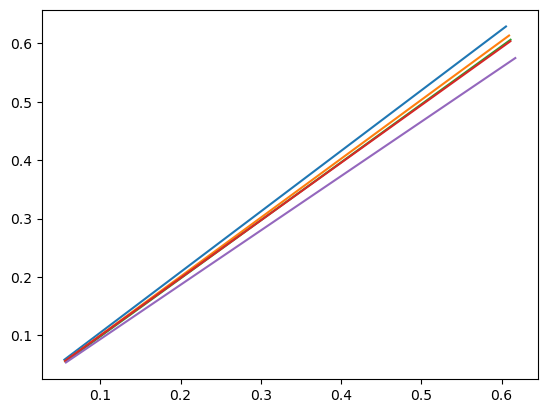

In [28]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
train_scores, valid_scores = validation_curve(Ridge(), Xtr, ytr,param_name="alpha",cv=5, param_range=[0,1000000])
plt.plot(train_scores,valid_scores)

**Final Analysis**: Summarize the conclusions you can make about the best hyperparameter settings for this dataset. How do you know your conclusions are supported by the data? To select the best hyperparameter settings we can create a validation curve in which we show the mean of the RMSE on 10 experiments of the test and train split, showing the average results. The best setting will be befor the experiment on the test split explodes and the error increases considerably.